Found 20 genres: ['Experimental_MEL', 'International_MEL', 'Electronic_MEL', 'Blues_MEL', 'Folk_MEL'] (showing 5 examples)
Genre 'Experimental_MEL' contains 1800 files
Genre 'International_MEL' contains 814 files
Genre 'Electronic_MEL' contains 3071 files
Genre 'Blues_MEL' contains 58 files
Genre 'Folk_MEL' contains 1214 files
Genre 'Easy_Listening_MEL' contains 13 files
Genre 'Punk_MEL' contains 2582 files
Genre 'Jazz_MEL' contains 364 files
Genre 'Unknown_MEL' contains 5076 files
Genre 'Pop_MEL' contains 945 files
Genre 'Hip-Hop_MEL' contains 1757 files
Genre 'Ambient_Electronic_MEL' contains 796 files
Genre 'Soul-RnB_MEL' contains 94 files
Genre 'Classical_MEL' contains 495 files
Genre 'Rock_MEL' contains 3095 files
Genre 'Chiptune_MEL' contains 1181 files
Genre 'Instrumental_MEL' contains 1044 files
Genre 'Spoken_MEL' contains 94 files
Genre 'Old-Time_MEL' contains 408 files
Genre 'Country_MEL' contains 142 files
Image 0: Genre = Experimental_MEL
Image 1: Genre = Experimental_MEL
I

I0000 00:00:1734435684.137532     588 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 24 bytes spill stores, 36 bytes spill loads



627/627 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.1809 - loss: 2.5717 - val_accuracy: 0.2376 - val_loss: 2.2576
Epoch 2/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2411 - loss: 2.2082 - val_accuracy: 0.2716 - val_loss: 2.0936
Epoch 3/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2598 - loss: 2.1478 - val_accuracy: 0.2720 - val_loss: 2.0837
Epoch 4/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2736 - loss: 2.1009 - val_accuracy: 0.2875 - val_loss: 2.0087
Epoch 5/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2782 - loss: 2.0680 - val_accuracy: 0.3027 - val_loss: 2.0061
Epoch 6/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2921 - loss: 2.0427 - val_accuracy: 0.3151 - val_loss: 1.9834
Epoch 7/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3004 - loss: 2.0275 - val_accuracy: 0.3219 - val_loss: 1.9616
Epoch 8/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3012 - loss: 2.0180 - val_accurac

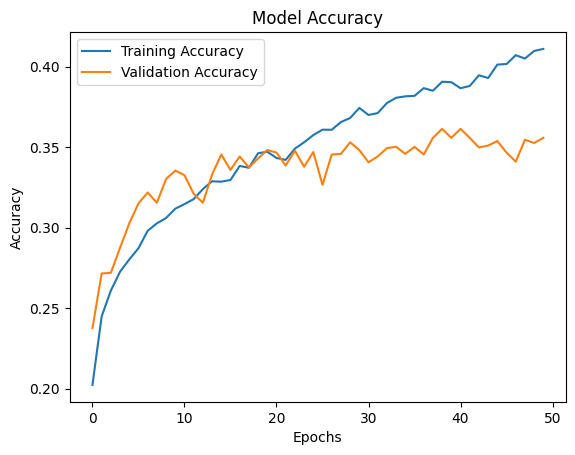

In [13]:
#%%
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, top_k_accuracy_score
from tensorflow.keras import Input

#%%
# Set paths
DATASET_PATH = '/kaggle/input/music-genres/Music_Mel'
IMG_SIZE = (128, 128)  # Resize all images to 128x128
BATCH_SIZE = 32

# Step 1: Load and prepare data
# Verify dataset structure
def verify_dataset_structure(dataset_path):
    genres = os.listdir(dataset_path)
    print(f"Found {len(genres)} genres: {genres[:5]} (showing 5 examples)")
    for genre in genres:
        genre_path = os.path.join(dataset_path, genre)
        print(f"Genre '{genre}' contains {len(os.listdir(genre_path))} files")

verify_dataset_structure(DATASET_PATH)

def load_data(dataset_path):
    images = []
    labels = []
    genres = os.listdir(dataset_path)  # Retrieve genre names (directory names)
    genre_to_label = {genre: idx for idx, genre in enumerate(genres)}

    for genre in genres:
        genre_path = os.path.join(dataset_path, genre)
        for file in os.listdir(genre_path):
            if file.endswith('.png'):
                img_path = os.path.join(genre_path, file)
                img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
                img = tf.keras.utils.img_to_array(img)
                images.append(img)
                labels.append(genre_to_label[genre])

    return np.array(images), np.array(labels), genre_to_label

# Load dataset
images, labels, genre_to_label = load_data(DATASET_PATH)

# Normalize image data
images = images / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(genre_to_label))

# Confirm images are tied to correct genres
for i in range(5):  # Display 5 examples
    genre_label = np.argmax(labels[i])  # Get the genre label from one-hot encoding
    genre_name = list(genre_to_label.keys())[list(genre_to_label.values()).index(genre_label)]
    print(f"Image {i}: Genre = {genre_name}")

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#%%
# Step 2: Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),  # Use Input layer here
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)  # 3 for RGB images
num_classes = len(genre_to_label)
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#%%
# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    verbose=1
)

# Step 4: Evaluate the model
predictions = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
top1_accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Ensure proper labels are passed to top_k_accuracy_score
valid_labels = np.arange(len(genre_to_label))  # Ensure it matches genre_to_label keys
top5_accuracy = top_k_accuracy_score(y_test_labels, predictions, k=5, labels=valid_labels)

print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"Top-1 Accuracy: {top1_accuracy * 100:.2f}%")
print(f"Top-5 Accuracy: {top5_accuracy * 100:.2f}%")

# Step 5: Save the model and genre mapping
model.save("music_genre_cnn_model.h5")
with open("genre_to_label_mapping.json", "w") as f:
    import json
    json.dump(genre_to_label, f)

#%%
# Optional: Visualize training results
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 # Prédiction d'une chanson donnée


In [30]:

from IPython.display import Audio


audio='/kaggle/input/test-songs/neck-deep-lowlife.wav'

# Display the audio

Audio(audio, rate=44100)  


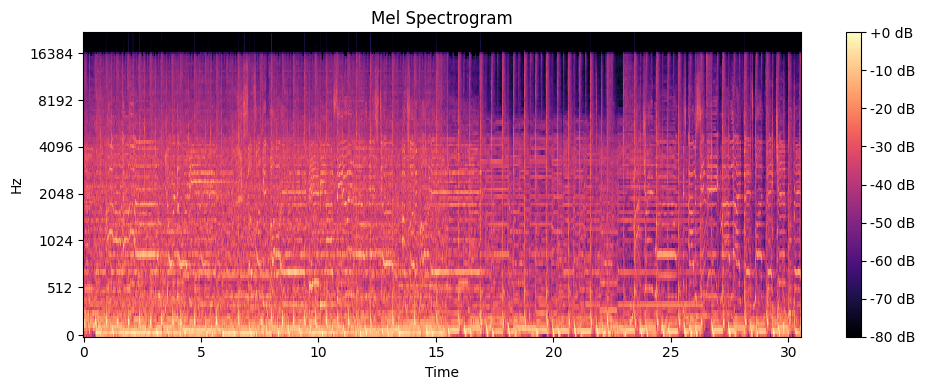

<Figure size 640x480 with 0 Axes>

In [38]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the WAV file
filename = "/kaggle/input/test-songs/neck-deep-lowlife.wav"
y, sr = librosa.load(filename, sr=None)  # y is the audio time series, sr is the sampling rate

# Create a Mel spectrogram
n_mels = 128  # Number of Mel bands
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=sr//2)

# Convert to decibels for better visualization
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=sr//2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

plt.savefig("/kaggle/working/song_mel2.png")


In [39]:
import tensorflow as tf
import numpy as np
import json
from tensorflow.keras.utils import load_img, img_to_array

# Charger le modèle et le mapping
model = tf.keras.models.load_model("music_genre_cnn_model.h5")
with open("genre_to_label_mapping.json", "r") as f:
    genre_to_label = json.load(f)

# Inverser le dictionnaire pour obtenir label -> genre
label_to_genre = {idx: genre for genre, idx in genre_to_label.items()}

# Prétraitement d'une image
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Prépare une image pour la prédiction en la redimensionnant, normalisant les pixels
    et ajoutant une dimension pour correspondre au format attendu par le modèle.
    """
    img = load_img(image_path, target_size=target_size)  # Charger l'image
    img_array = img_to_array(img)  # Convertir en tableau NumPy
    img_array = img_array / 255.0  # Normaliser les pixels entre 0 et 1
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension (batch size)
    return img_array

# Faire une prédiction
image_path = "/kaggle/working/song_mel2.png" 
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)[0]  # Récupérer la sortie sous forme de tableau 1D

# Exclure le genre "unknown" s'il existe dans le mapping
excluded_genre = "Unknown_MEL"
excluded_label = genre_to_label.get(excluded_genre, None)

# Filtrer les prédictions pour exclure "unknown" et associer les labels aux probabilités
valid_predictions = [
    (label, prob) for label, prob in enumerate(predictions) 
    if excluded_label is None or label != excluded_label
]

# Trier les prédictions par probabilité décroissante
valid_predictions = sorted(valid_predictions, key=lambda x: x[1], reverse=True)


print(f"Processed Image Shape: {processed_image.shape}")
print(f"Raw Predictions: {predictions}")
print(f"Excluded Label: {excluded_label}")
print(f"Valid Predictions: {valid_predictions[:3]}")


# Afficher les 3 meilleures prédictions
print("Top 3 prédictions :")
for label, prob in valid_predictions[:5]:
    genre = label_to_genre[label]
    print(f"{genre}: {prob * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Processed Image Shape: (1, 128, 128, 3)
Raw Predictions: [3.22124660e-01 7.14356836e-04 5.06358519e-02 1.64437961e-06
 5.57205582e-04 2.33736360e-16 4.59533110e-02 3.31714959e-03
 4.37378854e-01 1.07367225e-02 7.82956718e-04 4.34710132e-03
 1.61658619e-07 3.25076362e-05 8.76523852e-02 1.64617095e-02
 1.92228332e-02 6.88743385e-05 8.22537927e-10 1.16791016e-05]
Excluded Label: 8
Valid Predictions: [(0, 0.32212466), (14, 0.087652385), (2, 0.050635852)]
Top 3 prédictions :
Experimental_MEL: 32.21%
Rock_MEL: 8.77%
Electronic_MEL: 5.06%
Punk_MEL: 4.60%
Instrumental_MEL: 1.92%
